 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><ul class="toc-item"><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Show-class-values-for-race" data-toc-modified-id="Show-class-values-for-race-0.0.1">Show class values for race</a></span></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Replace-categorical-column-with-numbers" data-toc-modified-id="Replace-categorical-column-with-numbers-0.0.2">Replace categorical column with numbers</a></span></li></ul><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Visualizing-categorical-data" data-toc-modified-id="Visualizing-categorical-data-0.1">Visualizing categorical data</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Value-counts-for-all-categorical-features" data-toc-modified-id="Value-counts-for-all-categorical-features-0.1.1">Value counts for all categorical features</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Modifying-the-dataset-to-create-binary-classification-problem" data-toc-modified-id="Modifying-the-dataset-to-create-binary-classification-problem-0.2">Modifying the dataset to create binary classification problem</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Dropping-police-column" data-toc-modified-id="Dropping-police-column-0.2.1">Dropping police column</a></span></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Dropping-rows-with-non-white/non-black-victims" data-toc-modified-id="Dropping-rows-with-non-white/non-black-victims-0.2.2">Dropping rows with non-white/non-black victims</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Building,-training-and-testing-the-model" data-toc-modified-id="Building,-training-and-testing-the-model-0.3">Building, training and testing the model</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Creating-training-and-testing-set" data-toc-modified-id="Creating-training-and-testing-set-0.3.1">Creating training and testing set</a></span></li><li><span><a href="http://localhost:8888/notebooks/OneDrive/Documents/data_science_stuff/Personal_projects/ATF%20analysis/Final_538_dataset_analysis.ipynb#Training-a-decision-tree" data-toc-modified-id="Training-a-decision-tree-0.3.2">Training a decision tree</a></span></li></ul></li></ul></ul></div>

The goal here is to create a model using a decision tree on dataset. Decision trees are amazing tools to easily interpret a model since they split the data based on on certain thresholds for each column. They are easy to train with few hyper-parameters, easy to interpret, they do have a major drawback being that they tend to overfit the data. Despite this, as a first example of a machine learning algorithm, decision trees are intuitive and can give you valuable insight about your which can be used to build better models
 

Introduction to the dataset
I will use the sklearn algorithm to train a decision tree. As you will see many more lines are spent preparing the data for training rather than the actual training process (which really is just one line). The data set we are going to use can be found here -https://data.world/azel/gun-deaths-in-america. This data set is part of five thirty eight's gun deaths in America project. It contain bunch of information of victims of gun violence. Each row of the dataset contains - the year and month of the shooting, the intent of the shooter, whether cops were at the scene or not, the gender, age race and education level of the victim and finally the place where the shooting happened. There is specific information about whether the victim was hispanic or not. We take this dataset and boil it down to predicting just one of two classes- were the victims of the shooting white or black? Why ignore other victim class ? (There are 5 in total), firstly, the rest of the classes, as you will see make up less than 11% of the dataset, secondly the goal is to build a simple binary classification model, for those who are interested, I would love to work with people build a more multi classification model for the whole CDC multiple causes of death dataset

The plan for the analysis is the following- 
- I will first read and display the dataset to see what are the relevant columns 
- We will have to encode certain categorical variable so we can run the decision tree on them
- We will plot some of these categorical variables to see how skewed they are
- We will drop rows containing non white and non black victims 
- Create test and train sets
- Train the decision tree 
- Interpret results of the tree- I will leave that as set of the question so that the interested reader can further get involved with understanding the what the model represents

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing 
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,accuracy_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  

import pydotplus
from IPython.display import Image  


In [2]:
location ='D:/datasets/fivethirtyEight-gun-violence-data.csv'

In [3]:
#load dataset
gun_violence_dataset_original= pd.read_csv(location)

# remove rows with NA 
gun_violence_dataset_original = gun_violence_dataset_original.dropna()
gun_violence_dataset_original = gun_violence_dataset_original.drop(['Unnamed: 0'], axis=1)

In [4]:
# show the first few rows of dataset 
gun_violence_dataset_original.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0


### Show class values for race

We need to see what are the values in the race class, hence we get the value counts for each of the class variables. These number represent the count per race of these unfortunate victims. We find that majority of the victims were either black or white. We can convert to thes numbers into percentages and plot them to visualize it as well

In [5]:
pd.value_counts(gun_violence_dataset_original['race'])

White                             65504
Black                             22922
Hispanic                           8734
Asian/Pacific Islander             1294
Native American/Native Alaskan      889
Name: race, dtype: int64

Since we are going to be visualizing a bunch of columns I wrote two tiny functions one that converts the value counts to percentages, and another than plots a bar plot of the percentages. You can combine both functions into one and set an option flag for plotting but I did this for convenience

In [6]:
def val_count_to_percent(column): 
    """ Convert value counts of a dataframe column to percentages
    Input:
        column  - Nx1 array, Dataframe column
    Output: 
        percentages- Mx1 array, percentage of value counts for each variable  
    
    """
    return pd.value_counts(column)/(pd.value_counts(column).sum())*100 

def val_count_to_percent_plot(column, fig_width=10, fig_height=10): 
    """Calcuate the value count percentages and plot them
    Input:  
        column - Nx1 array, Dataframe column 
        fig_width - scalar, width of the displayed figure 
        fig_height-  scalar, height of the displayed figure 
        
    Output: 
        Bar plot of value count percentages, with xlabel, ylabel and column
        name as title 
    """

    height = np.array(val_count_to_percent(column).values)

    plt.figure(figsize=(fig_width,fig_height))
    plt.bar(range(height.shape[0]),height)
    plt.xticks(range(height.shape[0]),np.array(val_count_to_percent(column).index), fontsize=15 )
    plt.ylabel('Percent of data', fontsize=17)
    plt.xlabel('Feature values',fontsize=17)
    plt.title('column: '+column.name , fontsize= 17)
    plt.show()


From the bar plot below it is obvious that majority of the data is for black and white victims. Here I would like to point out that we can also make a multiclass problem by sampling the same number of rows as that of the hispanic victims to create a 3 class classification problem. I chose to just stick with binary classification problem since this is more for demonstration purposes then hardcore anaylsis of the dataset. Personally, I do beleive this dataset, the complete version of it does require proper analysis so what we can shed some trends on what kind of gun deaths or crimes are prevalant and if we can build a good model to predict based on a few parameters it can hopefully help law enforcement understand the nature of problem better. This really is the whole point of the data driven approach. But I digress. 

In [7]:
val_count_to_percent(gun_violence_dataset_original['race'])

White                             65.937207
Black                             23.073594
Hispanic                           8.791762
Asian/Pacific Islander             1.302558
Native American/Native Alaskan     0.894879
Name: race, dtype: float64

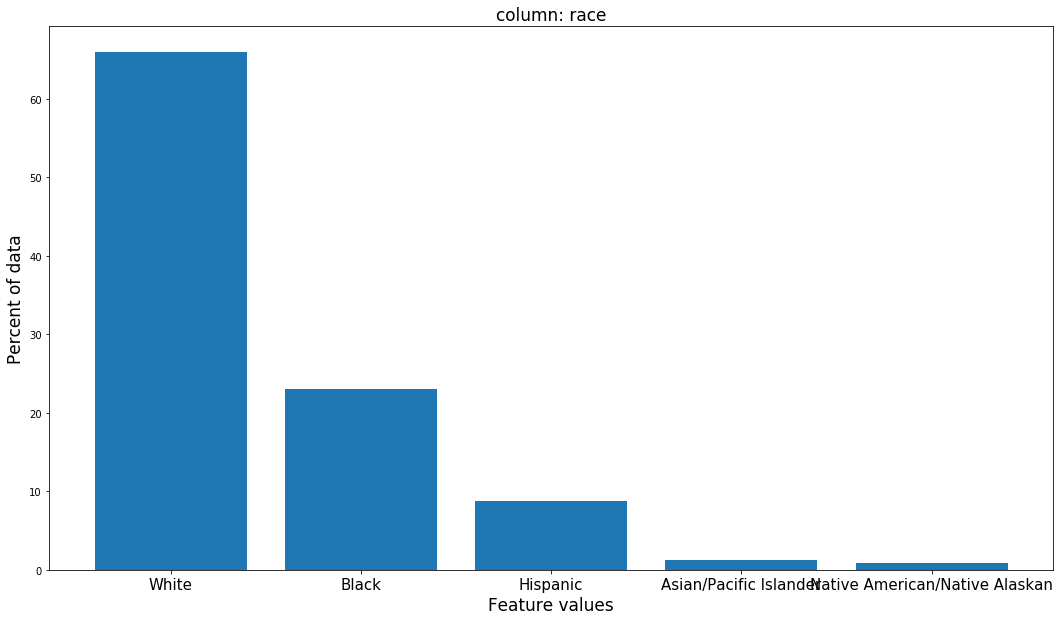

In [8]:
val_count_to_percent_plot(gun_violence_dataset_original['race'],fig_width=18 ,fig_height=10)


### Replace categorical column with numbers 

We need to convert categorical variables to labels, now generally you can do this manually for example- just write a for loop that goes over the 'sex' column and assign say 0 for men and 1 for women. But sklearn gives us a handy little function called the LabelEncoder, you give it a list of columns and run 'fit_transform' over the column and you can convert categorical data to labeled data

In [9]:

gun_violence_dataset = gun_violence_dataset_original.copy()


In [10]:
columns_to_encode =  ['intent','sex','place']
le = preprocessing.LabelEncoder()

for i  in range(len(columns_to_encode)): 
    column =columns_to_encode[i]
    gun_violence_dataset[column] = le.fit_transform(gun_violence_dataset[column])
    

In [11]:
gun_violence_dataset.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,2,0,1,34.0,Asian/Pacific Islander,100,1,4.0
1,2012,1,2,0,0,21.0,White,100,8,3.0
2,2012,1,2,0,1,60.0,White,100,3,4.0
3,2012,2,2,0,1,64.0,White,100,1,4.0
4,2012,2,2,0,1,31.0,White,100,3,2.0


## Visualizing categorical data 
### Value counts for all categorical features


I ended up visualizing most of the categorical columns in the dataset since there really arent too many. I guess one can put them in a subplot but I wanted the x and y axis to be legible. If the percent values are not legible then you can change the font in the val_count_to_percent function

Suicide         63.579719
Homicide        33.973204
Accidental       1.635747
Undetermined     0.811330
Name: intent, dtype: float64


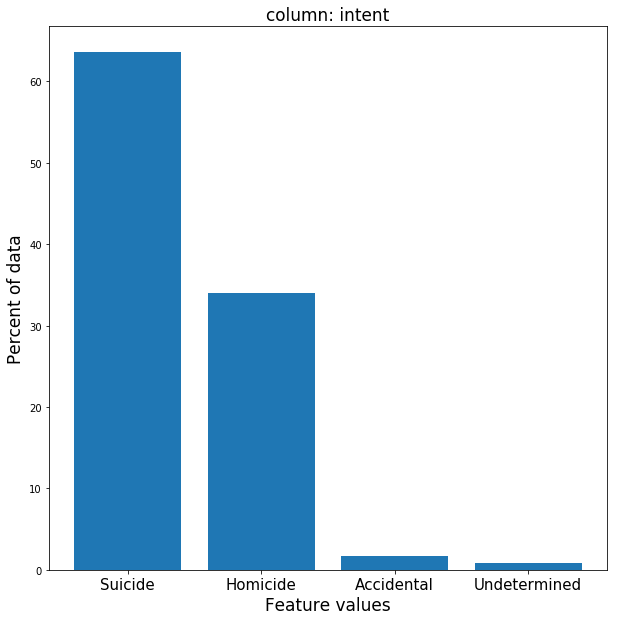

'intent'

In [12]:
print(val_count_to_percent(gun_violence_dataset_original['intent']))
val_count_to_percent_plot(gun_violence_dataset_original.intent)
gun_violence_dataset_original.intent.name

0    99.980874
1     0.019126
Name: police, dtype: float64


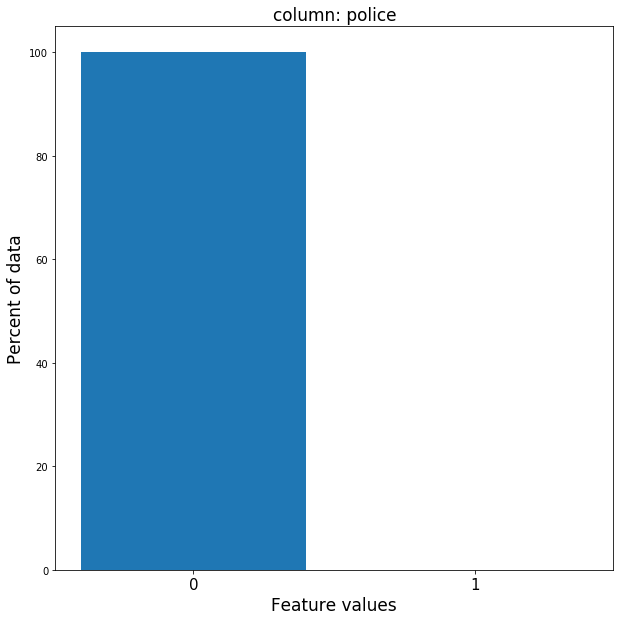

In [13]:
print(val_count_to_percent(gun_violence_dataset_original['police']))
val_count_to_percent_plot(gun_violence_dataset_original['police'])

M    85.541004
F    14.458996
Name: sex, dtype: float64


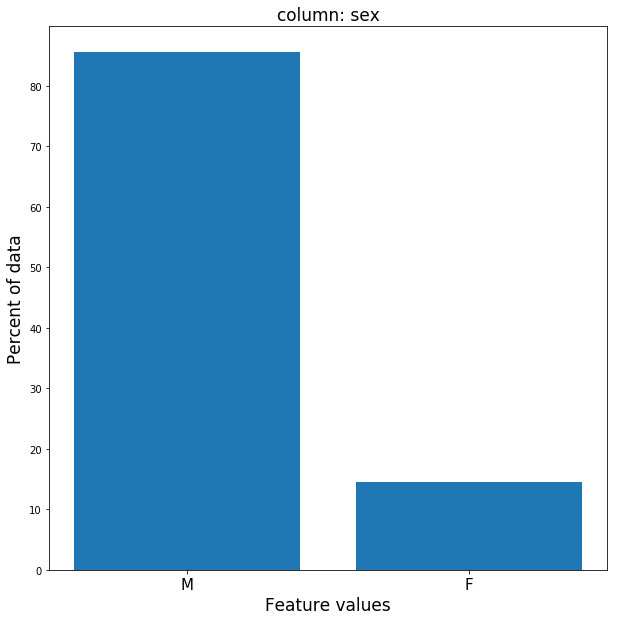

In [14]:
print(val_count_to_percent(gun_violence_dataset_original['sex']))
val_count_to_percent_plot(gun_violence_dataset_original['sex'])

2.0    42.537471
1.0    21.589845
3.0    21.571726
4.0    12.964175
5.0     1.336783
Name: education, dtype: float64


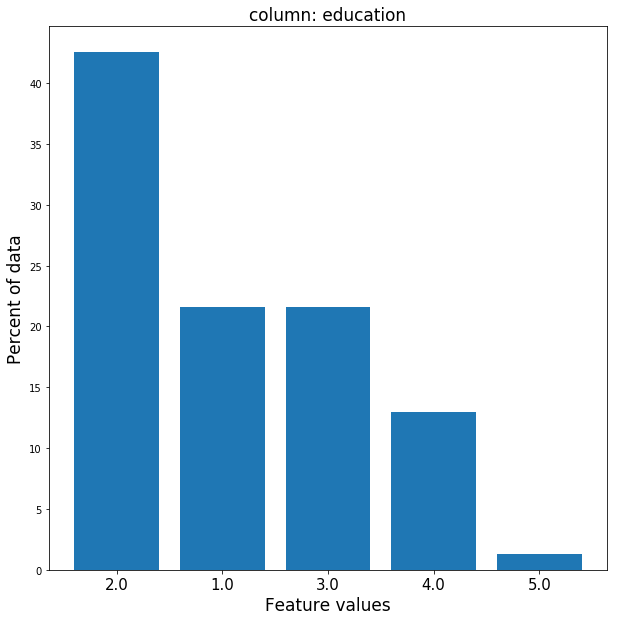

In [15]:
print(val_count_to_percent(gun_violence_dataset_original['education']))
val_count_to_percent_plot(gun_violence_dataset_original['education'])

Home                       60.842737
Other specified            13.829862
Street                     11.221727
Other unspecified           8.915575
Trade/service area          3.461744
School/instiution           0.674431
Farm                        0.471095
Industrial/construction     0.249640
Residential institution     0.204343
Sports                      0.128847
Name: place, dtype: float64


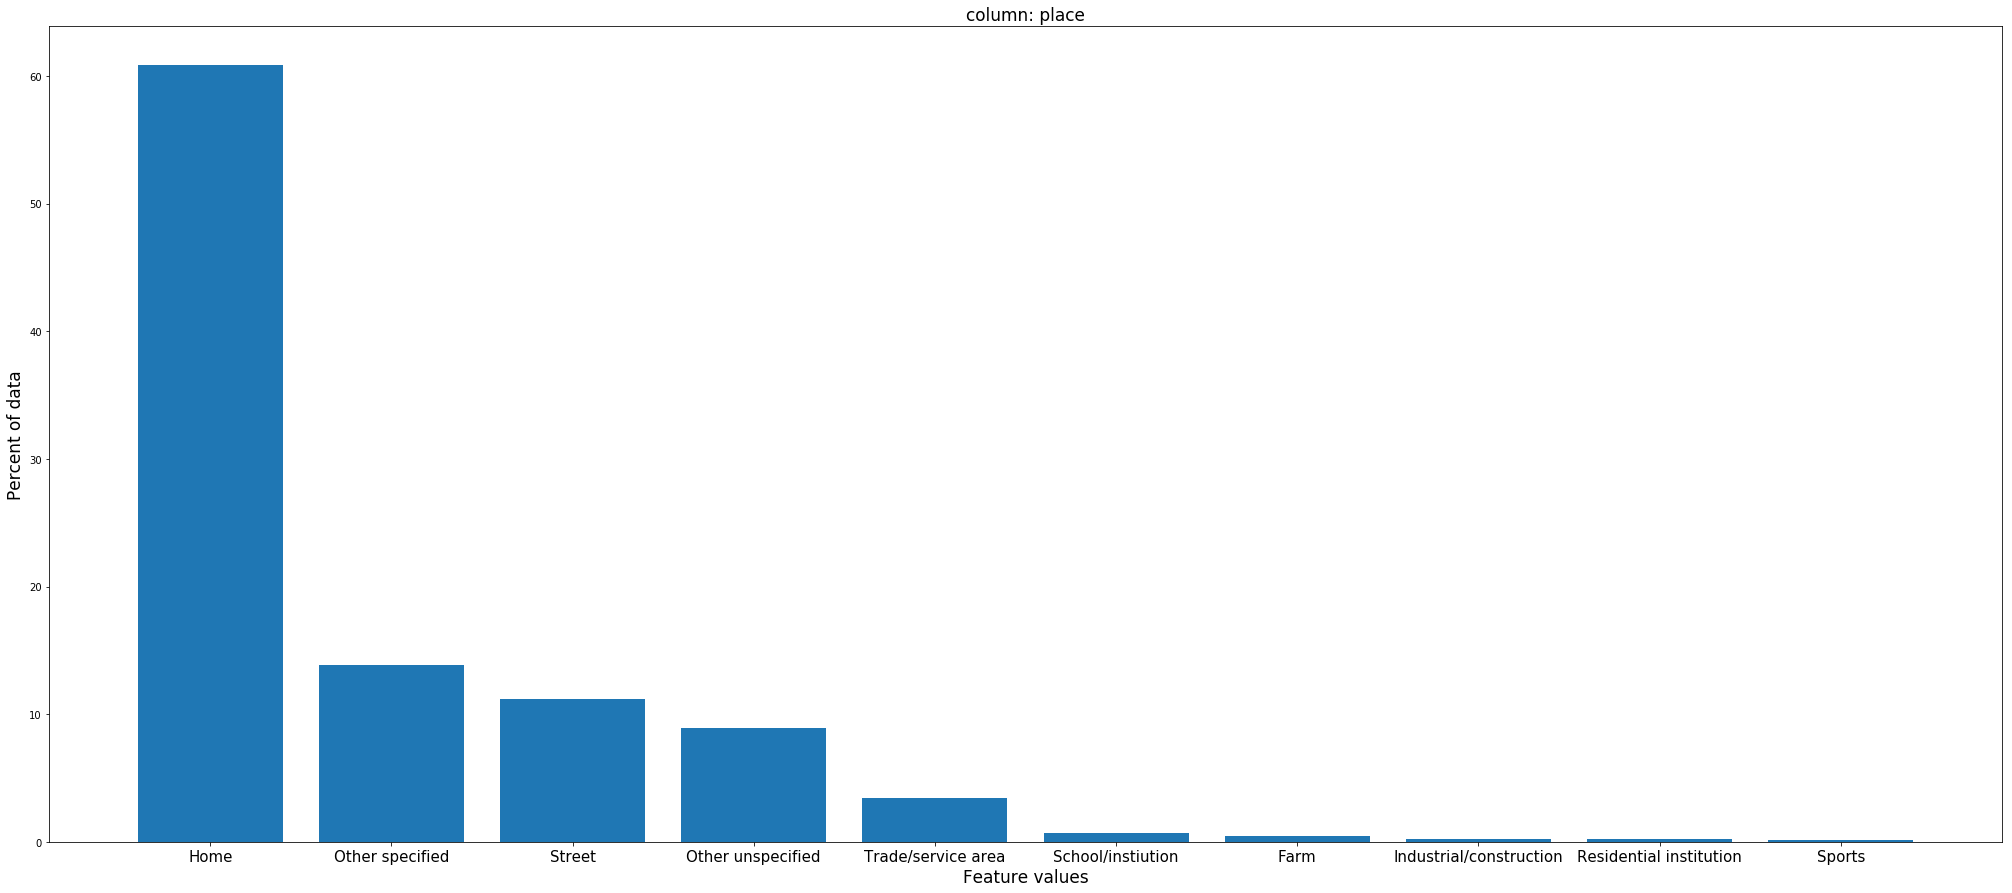

In [16]:
print(val_count_to_percent(gun_violence_dataset_original['place']))
val_count_to_percent_plot(gun_violence_dataset_original['place'],fig_width=35 , fig_height=15)

7     8.905509
8     8.700160
5     8.594466
6     8.588426
9     8.453540
4     8.383077
12    8.359925
10    8.350865
3     8.221012
1     8.206919
11    8.183767
2     7.052334
Name: month, dtype: float64


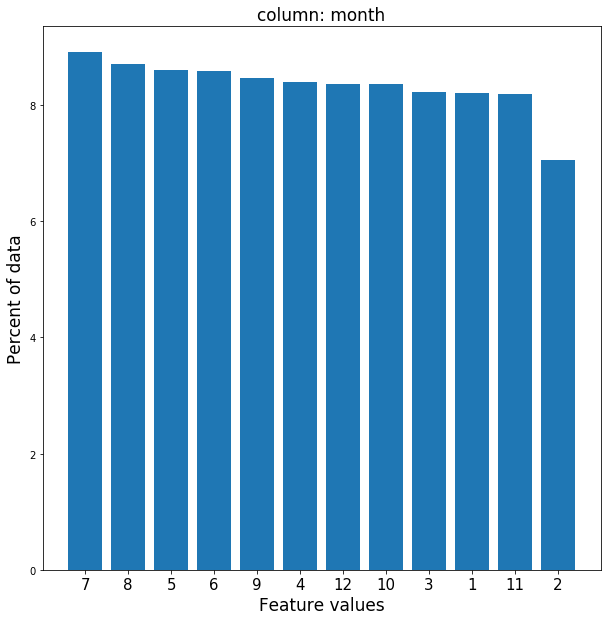

In [17]:
print(val_count_to_percent(gun_violence_dataset_original['month']))
val_count_to_percent_plot(gun_violence_dataset_original['month'])

2013    33.365209
2014    33.344071
2012    33.290720
Name: year, dtype: float64


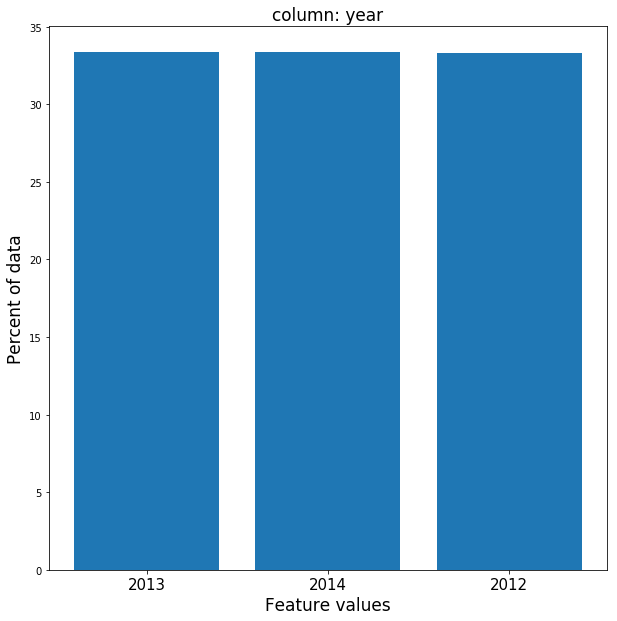

In [18]:
print(val_count_to_percent(gun_violence_dataset_original['year']))
val_count_to_percent_plot(gun_violence_dataset_original['year'])

   From the above we can basically drop the police column since it will no contribute to any classification. One can keep it as well, shouldn't really make much of a difference.There are other columns which are also fairly skewed like 'sex' but we shall keep them. With the 'police' 1 label just is entirely insignification to the current analysis hence its better to just throw it out. Just by looking at some of these charts one can reach certain conclusions, for example
   - Most victims are males 
   - Most gun deaths occur at home, about 10% occur on the street as well, these could be lone wolf shooters or in some cashes gang based shooting as well
   - Number of shootings tends to be fairly uniform across the year
   - There are fewer vicitims with high levels of education, so for example level 4 and 5 combined make up less than 15%  of all the victims with education levels 1 and 2 are over 60% of all the victims. One would need more data to understand why this is

## Modifying the dataset to create binary classification problem
### Dropping police column 


In [19]:
# dropping the police column
gun_violence_dataset = gun_violence_dataset.drop(['police'], axis=1)

gun_violence_dataset_org_moded =gun_violence_dataset_original.copy()
gun_violence_dataset_org_moded = gun_violence_dataset_org_moded.drop(['police'], axis=1)

# no police column 
gun_violence_dataset_org_moded.head()

,year,month,intent,sex,age,race,hispanic,place,education
0,2012,1,Suicide,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2012,1,Suicide,F,21.0,White,100,Street,3.0
2,2012,1,Suicide,M,60.0,White,100,Other specified,4.0
3,2012,2,Suicide,M,64.0,White,100,Home,4.0
4,2012,2,Suicide,M,31.0,White,100,Other specified,2.0


### Dropping rows with non-white/non-black victims

In [20]:
drop_rows = np.where((gun_violence_dataset['race']=='Hispanic') | (gun_violence_dataset['race']=='Asian/Pacific Islander')
                                    |(gun_violence_dataset['race']=='Asian/Pacific Islander') 
         | (gun_violence_dataset['race']=='Native American/Native Alaskan') )



In [21]:
gun_violence_dataset.drop(gun_violence_dataset.index[list(drop_rows[0])], inplace=True)
gun_violence_dataset_org_moded.drop(gun_violence_dataset_org_moded.index[list(drop_rows[0])], inplace=True)


In [22]:
# so we have elimated all other class values other than white and black
np.unique(gun_violence_dataset['race'])


array(['Black', 'White'], dtype=object)

In [23]:
# must not forget to label encode the race category as well
gun_violence_dataset['race'] = le.fit_transform(gun_violence_dataset['race'])
gun_violence_dataset.head()

,year,month,intent,sex,age,race,hispanic,place,education
1,2012,1,2,0,21.0,1,100,8,3.0
2,2012,1,2,1,60.0,1,100,3,4.0
3,2012,2,2,1,64.0,1,100,1,4.0
4,2012,2,2,1,31.0,1,100,3,2.0
6,2012,2,3,1,48.0,1,100,1,2.0


## Building, training and testing the model 
### Creating training and testing set 
I can ofcourse manually create these by using iloc or just numpy but I will use the sklearn.model_selection 

In [24]:
# fixed the random state to ensure that I get the same split each time
train_X, test_X = model_selection.train_test_split(gun_violence_dataset,test_size=0.3,random_state= 1)

In [25]:
train_y = train_X['race']
train_X = train_X.drop(['race'], axis=1)

test_y = test_X['race']
test_X = test_X.drop(['race'], axis=1)


### Training a decision tree 
 This is where I use the train the decision tree classifer, as you can see, its oh so convinently a one liner. Work above was to get the training set and the test set, and once we have it we can throw any kind of classifer we want at it. We get th predictions using the predict function of the model. The accuracy is fairly easy to calcuate, we can just equate y_preds to test_y and sum it up, recall and precision are also fairly easy to calcuated. I will refer you to the wiki article on recall and precision to know what they are-https://en.wikipedia.org/wiki/Precision_and_recall, they have done a pretty nice job of explaing it. We get an accuracy of about 87 percent. Which is not too shabby since its a single decision tree. One thing I did notice was that its better to just have a shallow tree, in my case its 8 units deep vs something that deep since deeper trees would mean that there is greater chance of overfitting the data  

In [26]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth = 8,
                                  min_samples_leaf = 100)

clf = clf.fit(train_X, train_y)
y_preds = clf.predict(test_X)


In [27]:
# calculate the accuracy 
print('accuracy: ', accuracy_score(test_y,y_preds))


accuracy:  0.878392641737


Since we are essentially dealing with a binary classification, we can use recall and precision scores as well. As we see we get fairly high values

In [28]:

print('recall: ', recall_score(test_y,y_preds))   
print('precision: ', precision_score(test_y,y_preds))


recall:  0.924304210419
precision:  0.912398108081


Visualize the decision tree 

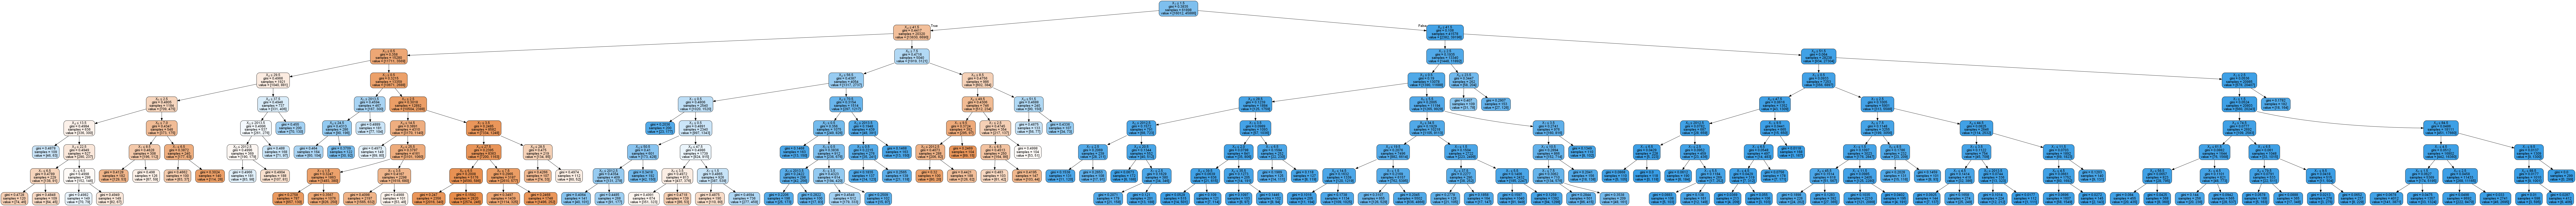

In [29]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
img_object = Image(graph.write_png('decisiontree.png'))
Image(graph.create_png())

So now we have a decision tree based model that can use to predict based on a few parameters whether the vicitm of a gun death will either be a black person or a white person? What next. We can use the tree to figure out what are some of the improtant features reponsible for deciding whether the victim will black or white. 'feature_importances' gives us an array that  scores each of the features, the array sums to 1. Using this we can decide which are the relevant features we should worry about when deciding the race of the victim. Lets also extact the column names of the test or the training dataset so we can plot a bar plot with feature_importance 

In [30]:
#extracting important features 
important_features = clf.feature_importances_

#column names 
column_names = train_X.columns

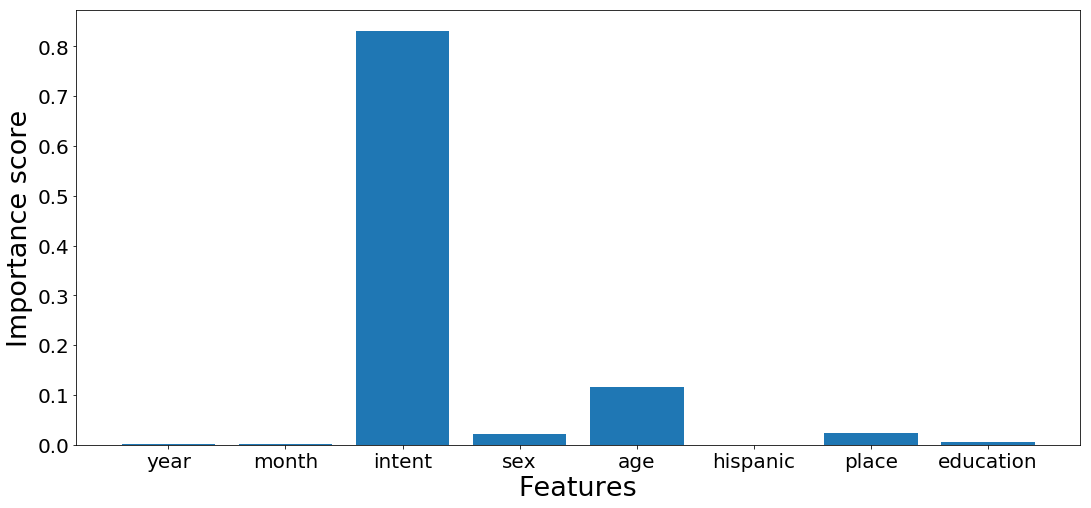

In [31]:
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

plt.figure(figsize=(18,8))
plt.bar(range(column_names.shape[0]), important_features)
plt.xticks(range(column_names.shape[0]), column_names, fontsize= 20)
plt.xlabel('Features', fontsize=27)
plt.ylabel('Importance score', fontsize=27)
plt.show()

This is interesting that for black and white vicitim, the deciding factor seems to be the intent, and the other three factors being age, gender and place. The education levels suprisingly seem to have very little effect on deciding the race of the victim. there are ways that one can extend the analysis further by studying on what class values in the intent column are relavent to race of victims. For exmaple, the five thirty eight has articles on how suicides are prevalent among middle aged men https://fivethirtyeight.com/features/suicide-in-wyoming/ and homocides are prevalent amongst black men https://fivethirtyeight.com/features/homicide-in-new-orleans/. The latter is a well documente phenomenon, the prevelance of gang violence, drug related killings and aggresion driven gun deaths have caused homicide rates in cities like New Orleans and Balitmore to be very high 



For technical information - 

Gini criterion - Elements of Statistical Learning 

Decision tree classifer - http://scikit-learn.org/stable/modules/tree.html
                            The scikit learn documentation is actually pretty decent 
                            
CDC deaths due to multiple causes - https://www.cdc.gov/nchs/data_access/VitalStatsOnline.htm#Mortality_Multiple                            
                            
                            